In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## 1

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## 2

In [3]:
commits = pd.io.sql.read_sql(
    """
    SELECT timestamp
    FROM checker
    WHERE uid LIKE "user_%";
    """,
    con=conn, parse_dates=['timestamp']
)

In [4]:
commits[['day', 'hour']] = commits['timestamp'].apply(lambda x: pd.Series([x.date(), x.time().hour]))
commits = commits.drop(columns=['timestamp'])
commits['day'] = commits['day'].astype('datetime64[ns]')
commits['hour'] = pd.to_numeric(commits['hour'].values, downcast='integer')
commits['daytype'] = commits['day'].dt.dayofweek
commits['daytype'] = commits['daytype'].apply(lambda x: 'weekend' if x > 4 else 'working_day')

In [5]:
commits

,day,hour,daytype
0,2020-04-17,5,working_day
1,2020-04-17,5,working_day
2,2020-04-17,5,working_day
3,2020-04-17,5,working_day
4,2020-04-17,5,working_day
...,...,...,...
3202,2020-05-21,20,working_day
3203,2020-05-21,20,working_day
3204,2020-05-21,20,working_day
3205,2020-05-21,20,working_day


In [78]:
weekend = (
    commits[commits['daytype'] == 'weekend']
    .drop(columns=['day', 'daytype'])
)

In [82]:
working_days = (
    commits[commits['daytype'] == 'working_day']
    .drop(columns=['day', 'daytype'])
)

(array([  6.,   6.,   0.,   1.,   0.,   2.,   0.,  16.,  28.,  22.,  28.,
        118.,  57., 108.,  87., 114.,  74.,  50.,  68., 105., 117.,  72.,
         59.,  32.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

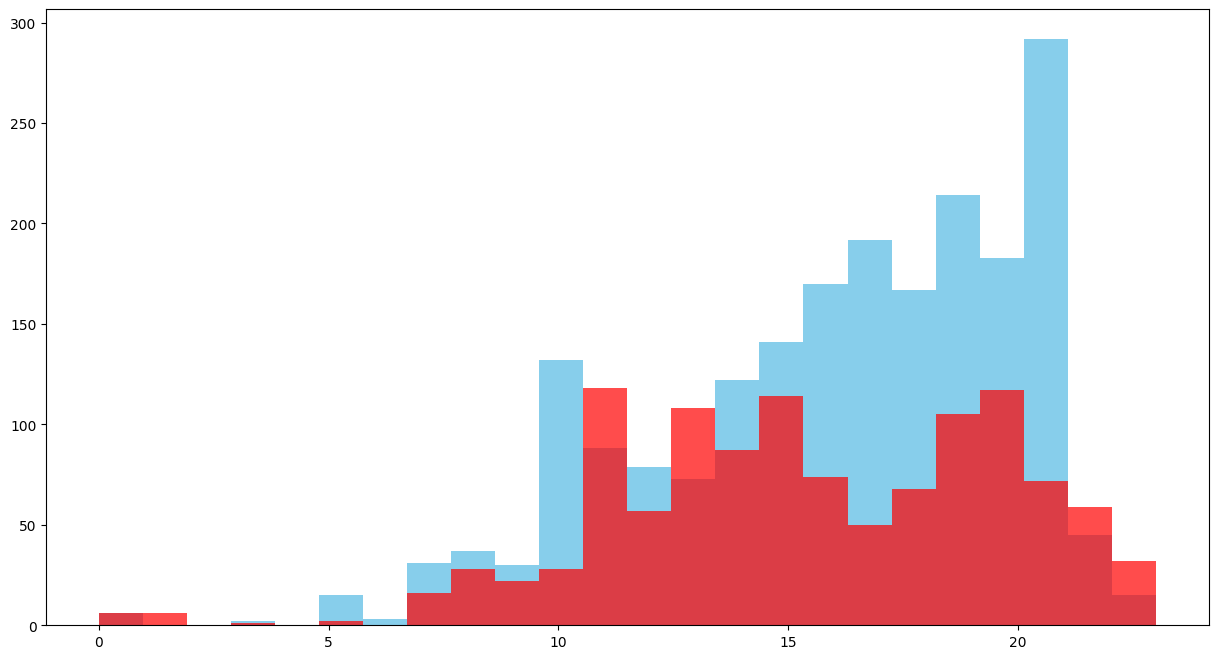

In [124]:
plt.figure(figsize=(15, 8))
plt.hist(working_days.values, bins=24, label='working_days', color='skyblue')
plt.hist(weekend.values, bins=24, label='weekend', color='red', alpha=0.7)

## 3

In [122]:
conn.close()

## 4

Are there hours when the total number of commits was higher on weekends than on working days? - Yes, there are. For example, 00:00, 01:00, 11:00, 22:00